In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lista 01

Lista de exercício do professor Yasser, Learning from Data

In [176]:
def generateData( targetModel, trainnSz, testSz):
     """função que cria o dataset do problema a partir de um modelo. No esquema de aprendizado, esse modelo é desconhecido
    following properties:

    Attributes:
        targetModel: O mapeamento "desconhecido" que se deseja aprender
        trainnSz: tamanho do conjunto de treinamento
        trainnSz: tamanho do conjunto de treinamento
    """
    data = {}
    X_train = np.random.uniform(-1,1,(trainnSz, len(targetModel._w) - 1))
    X_test = np.random.uniform(-1,1,(testSz, len(targetModel._w) - 1))
    Y_train = targetModel.predict(X_train)
    Y_test = targetModel.predict(X_train)
    return (X_train, Y_train, X_test, Y_test)

In [177]:
class PerceptronModel:
    
    def __init__(self, dim):
        self._dim = dim
        self._w = .01*np.ones((dim + 1,1))
        
    def predict(self, x):
        
        dim = x.shape[1]
        numSamples = x.shape[0]
        
        assert self._dim == dim, "dimension do not match"
        
        x = x.reshape(-1,dim)
        ones = np.ones((numSamples,1))
        
        X = np.concatenate(( ones,x), axis=1)
        
        return np.sign(np.matmul(X, self._w))

In [233]:
class PerceptronLearningAlgorithm:
    
    def __init__(self, epochs):
        self._epochs = epochs
        self._info = {"epochs": epochs, "w":[], "loss": [], "converged": -1}
    
    def update(self, x, y):
        y_hat =  self._model.predict(x)
        if y_hat != y:
            w0 = self._model._w
            dim = len(w0) - 1
            x = x.reshape(1, dim)
            ones = np.ones((1,1))
            
            x_extend = np.concatenate(( ones,x), axis=1)
            self._model._w = w0 + y*x_extend.reshape(w0.shape)
            return 1
        return 0
    
    def updateInfo(self, k, missClissified):
        self._info["w"].insert(k, self._model._w)
        self._info["loss"].insert(k, missClissified)
        if (k > 0):
            loss0 = self._info["loss"][k-1]
            if missClissified != loss0:
                self._info["converged"] = -1
            else:
                if loss0 == -1:
                    self._info["converged"] = k
                    
    
    def train(self, X_train, Y_train):
        dim = X_train.shape[1]
        numSamples = X_train.shape[0]
        
        self._model = PerceptronModel(dim)
        for k in range(0, self._epochs):
            missClissified = 0
            for i in range(0, numSamples):
                x = X_train[i,:].reshape(1,dim)
                y = Y_train[i,:].reshape(1,1)
                missClissified = missClissified + self.update(x,y)
            self.updateInfo(k, missClissified)
        
        return self._model, self._info

In [234]:
myFun = PerceptronModel(2)
myFun._w = np.array([.1,-.2, .1]).reshape(3,1)

In [235]:
X_train, Y_train, X_test, Y_test = generateData( myFun, 10000, 5)

In [236]:
np.average(Y_train)

0.513

In [237]:
X_train

array([[ 0.57946766,  0.30230678],
       [ 0.02785048,  0.37454162],
       [ 0.65162322, -0.43173373],
       ...,
       [ 0.14124637, -0.64721665],
       [-0.6561222 , -0.11044888],
       [ 0.20330189,  0.18804926]])

In [238]:
X_train.shape

(10000, 2)

In [252]:
pla = PerceptronLearningAlgorithm(epochs=500)

In [253]:
model, info = pla.train(X_train,Y_train)

## resultados do treinamento

### Convergência da função de loss

A função de loss que o perceptron realmente tenta minimizar é o número de exemplos mal classificados.

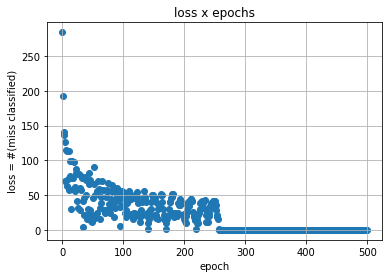

In [257]:
loss = info["loss"]
epochs = info["epochs"]
plt.figure()
plt.scatter(x=range(0,epochs),y=loss)
plt.title('loss x epochs')
plt.xlabel('epoch')
plt.ylabel('loss = #(miss classified)')
plt.grid()
plt.show()

In [256]:
print("A convergência aconteceu na epoca %i" % info["converged"])

A convergência aconteceu na epoca 499


### Convergência dos parâmetros

In [283]:
w0 = [ x[0,0] for x in W_hist]
w1 = [ x[1,0] for x in W_hist]
w2 = [ x[2,0] for x in W_hist]

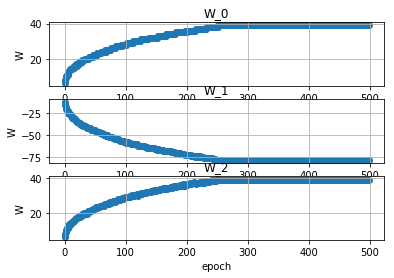

In [287]:
plt.figure()

W_hist = info["w"]

plt.subplot(3,1,1)
plt.scatter(x=range(0,epochs),y=w0)
plt.title('W_0')
plt.xlabel('epoch')
plt.ylabel('W')
plt.grid()

plt.subplot(3,1,2)
plt.scatter(x=range(0,epochs),y=w1)
plt.title('W_1')
plt.xlabel('epoch')
plt.ylabel('W')
plt.grid()

plt.subplot(3,1,3)
plt.scatter(x=range(0,epochs),y=w2)
plt.title('W_2')
plt.xlabel('epoch')
plt.ylabel('W')
plt.grid()

plt.show()

Percebe-se que os parâmetros não convergem para os valores exatos. Pois como f é linear, basta que a a diração coinscida com o vetor original. O vetro de parâmetros normalizado, devria convergir para o vertor de parâmetros ideal também noramlizado

In [300]:
print("vetor w aprendido pelo Algoritmo PLA", model._w.T/np.linalg.norm(model._w))
print("vetor w da funçaõ alvo (normalizado) ", myFun._w.T/np.linalg.norm(myFun._w))

vetor w aprendido pelo Algoritmo PLA [[ 0.4081881  -0.81644141  0.40841878]]
vetor w da funçaõ alvo (normalizado)  [[ 0.40824829 -0.81649658  0.40824829]]
